In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [146]:
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)
df

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN,NaN,0.000000
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN,NaN,0.000000
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN,NaN,3.929617
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN,NaN,10.820976
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628,NaN,5.810933
...,...,...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,6.5875,1.984293,20.397347
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859,5.842276,8.520190
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,7.3573,3.147301,19.349558
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143,3.560438,3.062187


In [147]:
df['year']=pd.to_datetime(df['year'], format='%Y')

In [148]:
df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [149]:
###Model per country

In [150]:
# A function to select and loc the data from a country.

def data_country(country):
    i=df.loc[df['country']==country]
    return i

In [206]:
#data_country('Germany').groupby('year').agg({'depression_rate':divide()})
def ratio_FM(country):
    
    #table for female
    f=data_country(country).loc[data_country(country)['sex']=='female']
    #table for male
    m=data_country(country).loc[data_country(country)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['ratio_suicide']=abs(i['suicides_per_100K_y']/i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']/i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_for_year($)_y','HDIforyear_y','suicides_per_100K_y','suicides_per_100K_x','gdp_per_capita($)_y','ratio_suicide','ratio_depression','unemployment_y','unemployment_x']].copy()

    

In [207]:
ratio_FM('Germany')

,year,country,gdp_for_year($)_y,HDIforyear_y,suicides_per_100K_y,suicides_per_100K_x,gdp_per_capita($)_y,ratio_suicide,ratio_depression,unemployment_y,unemployment_x
0,1990-01-01,Germany,1764967948917,0.801,26.472377,11.272625,23546,2.348377,0.572171,4.0393,6.1190
1,1991-01-01,Germany,1861873895109,NaN,26.560966,11.123658,24662,2.387791,0.572850,4.4244,6.5251
2,1992-01-01,Germany,2123130870382,NaN,25.362999,10.497541,27888,2.416090,0.574403,4.9109,8.2263
3,1993-01-01,Germany,2068555542411,NaN,24.096710,9.416838,26937,2.558896,0.576056,6.4606,9.3198
4,1994-01-01,Germany,2205966011812,NaN,24.417641,9.021331,28588,2.706656,0.578413,7.5441,10.3158
5,1995-01-01,Germany,2591620035485,0.830,24.513622,9.181619,33420,2.669858,0.580111,7.0530,9.6285
6,1996-01-01,Germany,2503665193657,NaN,23.072978,8.730561,32147,2.642783,0.584366,8.2420,9.5933
7,1997-01-01,Germany,2218689375141,NaN,23.284130,8.526154,28420,2.730906,0.591194,9.3083,10.5914
8,1998-01-01,Germany,2243225519618,NaN,22.605315,7.661240,28733,2.950608,0.598970,9.2892,10.4390
9,1999-01-01,Germany,2199957383337,NaN,21.256227,7.672099,28154,2.770588,0.604913,8.5594,9.2353


In [208]:
def plot_ratios(country):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=ratio_FM(country)
    
    ax1.plot(df['year'], df['ratio_suicide'], 'r-',label="ratio_suicide",linewidth=4)

    #(% of the labor force)    
    ax2.plot(df['year'], df['ratio_depression'], color='grey', label="ratio_depression",linewidth=2,linestyle='-') 
    
    ax3.plot(df['year'], df['unemployment_x'],color='magenta',label="unemployment_women",linestyle='--')
    ax3.plot(df['year'], df['unemployment_y'],color='deepskyblue',label="unemployment_men",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("ratio_suicide")
    ax2.set_ylabel("ratio_depression")
    ax3.set_ylabel("ratio_unemployment")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('grey')
    ax3.yaxis.label.set_color('m')

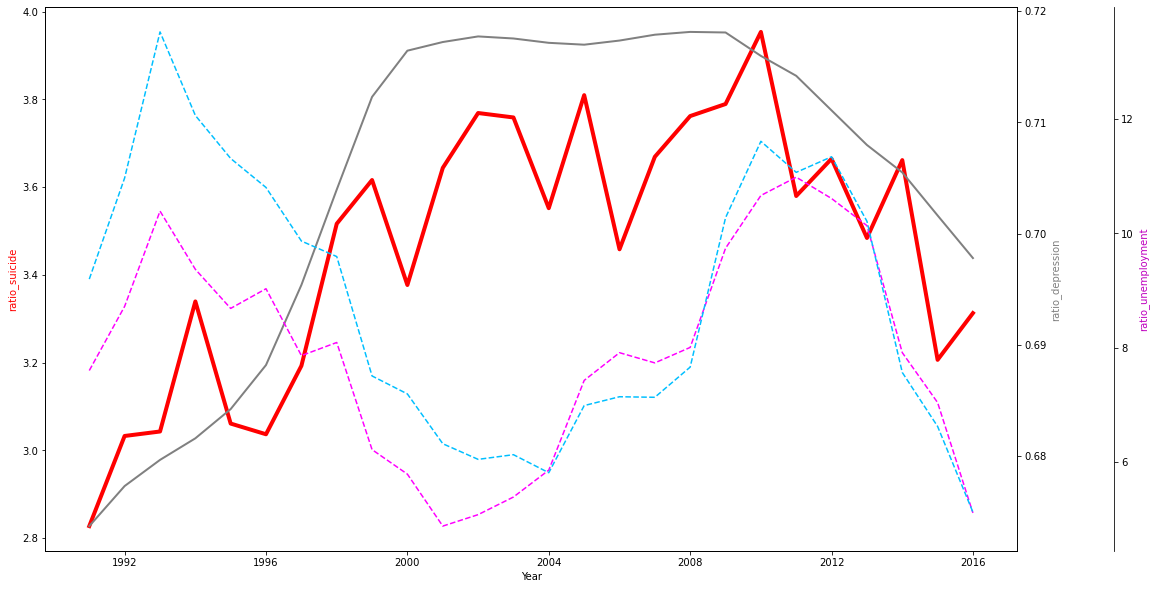

In [223]:
plot_ratios('Hungary')

In [254]:
#building the model and see the coeficients



def model_country(country):
    df=ratio_FM(country)
    df = sm.add_constant(df)
    y = df['ratio_suicide']
    X = df[[ 'const','unemployment_x','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [258]:
model_country('Hungary')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratio_suicide   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     31.08
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.32e-08
Time:                        17:20:32   Log-Likelihood:                 16.538
No. Observations:                  26   AIC:                            -25.08
Df Residuals:                      22   BIC:                            -20.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.8848      1.912     -5.693      0.000     -14.850      -6.919
unemployment_x      -0.0050      0.038     -0.133      0.895      -0.083       0.073
unemployment_y       0.0313      0.035      0.901      0.377      -0.041       0.103
ratio_depression    20.0274      2.642      7.580      0.000      14.548      25.507
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   2.612
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.238
Skew:                          -0.049   Prob(JB):                        0.888
Kurtosis:                       2.542   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
### per year

In [213]:
def data_year(year):
    i=df.loc[df['year']==pd.to_datetime(year, format='%Y')]
    return i

In [214]:
data_year('2010')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
3660,2010-01-01,Albania,female,35,1371628,0.722,11926953259,4359,15.843800,2.739038,2.551712
3661,2010-01-01,Albania,male,61,1364397,0.722,11926953259,4359,12.732000,1.646725,4.470839
3662,2010-01-01,Argentina,female,566,19269234,0.811,423627422092,11273,9.168900,4.534164,2.937325
3663,2010-01-01,Argentina,male,2377,18309220,0.811,423627422092,11273,6.647400,2.689928,12.982530
3664,2010-01-01,Armenia,female,19,1437243,0.721,9260284938,3460,21.233601,3.115304,1.321975
...,...,...,...,...,...,...,...,...,...,...,...
3831,2010-01-01,United States,male,30275,141810594,0.909,14964372000000,51989,10.521100,3.498460,21.348899
3832,2010-01-01,Uruguay,female,126,1626515,0.780,40284481652,12882,9.395800,4.312488,7.746624
3833,2010-01-01,Uruguay,male,421,1500791,0.780,40284481652,12882,5.271100,2.656078,28.051874
3834,2010-01-01,Uzbekistan,female,453,12940656,0.655,39332770929,1533,6.300000,3.330128,3.500595


In [252]:
def plot_gdp_suicide(year):
    fig, ax = plt.subplots(figsize=(15,10))

    ax = sns.scatterplot(x=data_year(year)['HDIforyear'],
                         y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    
    fig, ax2 = plt.subplots(figsize=(15,10)) 
    
    ax2 = sns.scatterplot(x=data_year(year)['gdp_for_year($)'],
                        y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    plt.xscale('log')

    
    ax.set_xlabel("HDIforyear")
    ax.set_ylabel("suicides_per_100Ks")

    
    

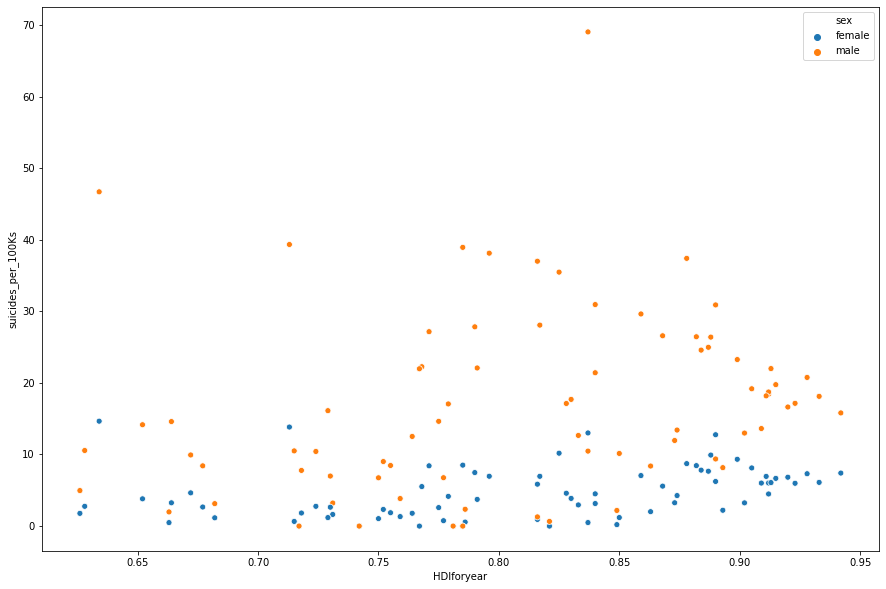

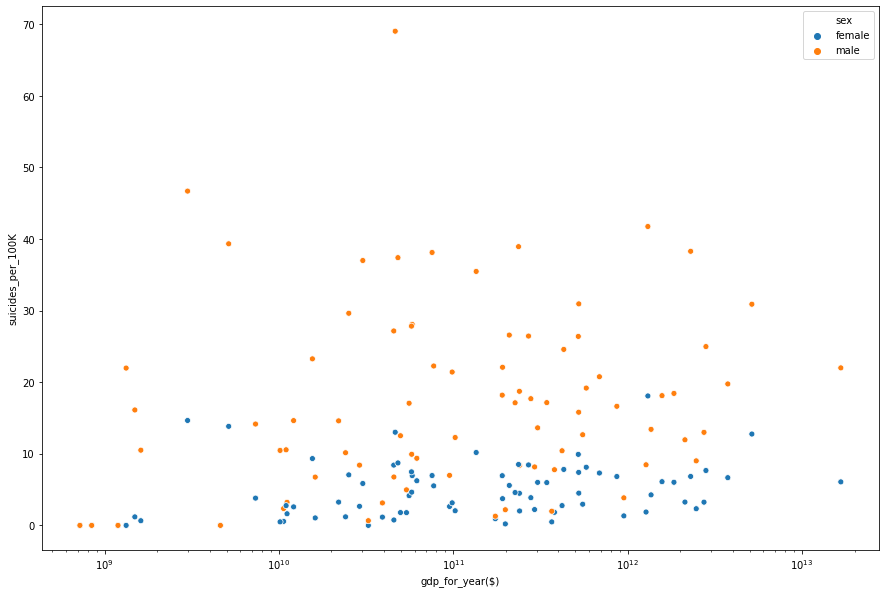

In [253]:
plot_gdp_suicide('2013')

In [285]:

def year_country_gdp(year):
    
    #table for female
    f=data_year(year).loc[data_year(year)['sex']=='female']
    #table for male
    m=data_year(year).loc[data_year(year)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['suicide_ratio']=abs(i['suicides_per_100K_y']-i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']-i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_per_capita($)_y','suicides_per_100K_y','suicides_per_100K_x','suicide_ratio','ratio_depression','unemployment_y','unemployment_x']].copy()
    

In [286]:
year_country_gdp('2006').dropna()

,year,country,gdp_per_capita($)_y,suicides_per_100K_y,suicides_per_100K_x,suicide_ratio,ratio_depression,unemployment_y,unemployment_x
0,2006-01-01,Albania,3235,0.000000,0.000000,0.000000,1.103156,11.8000,16.799999
2,2006-01-01,Argentina,6475,14.264295,3.322358,10.941937,1.850972,8.3622,12.340800
5,2006-01-01,Australia,39014,17.142079,5.123782,12.018297,2.173909,4.6676,4.921700
6,2006-01-01,Austria,42698,26.190667,7.331315,18.859352,2.108348,4.9412,5.601400
9,2006-01-01,Barbados,16531,7.331438,0.000000,7.331438,0.948352,7.7200,9.840000
...,...,...,...,...,...,...,...,...,...
78,2006-01-01,Trinidad and Tobago,15190,19.226493,4.254149,14.972344,1.002179,4.5200,8.720000
80,2006-01-01,Ukraine,2418,40.583394,7.105431,33.477963,1.477623,7.0047,6.603100
82,2006-01-01,United Kingdom,47163,11.417815,3.206867,8.210948,1.559905,5.6934,4.945500
83,2006-01-01,United States,49666,19.187222,4.927051,14.260171,2.512669,4.6193,4.627400


In [291]:
#building the model and see the coeficients



def model_per_year(year):
    
    df=year_country_gdp(year).dropna()
    df = sm.add_constant(df)
    y = df['suicide_ratio']
    X = df[[ 'const','unemployment_x','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [299]:
model_per_year('2013')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          suicide_ratio   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9445
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.425
Time:                        17:32:37   Log-Likelihood:                -235.56
No. Observations:                  65   AIC:                             479.1
Df Residuals:                      61   BIC:                             487.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.1280      3.558      4.533      0.000       9.013      23.243
unemployment_x      -0.7837      0.515     -1.523      0.133      -1.813       0.245
unemployment_y       0.8190      0.543      1.509      0.136      -0.266       1.904
ratio_depression    -1.7034      1.972     -0.864      0.391      -5.647       2.241
==============================================================================
Omnibus:                       30.179   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.514
Skew:                           1.485   Prob(JB):                     2.19e-15
Kurtosis:                       7.013   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""